<a href="https://colab.research.google.com/github/wellia/Machine_Learning/blob/main/SVM_Kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import svm
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import plotly.express as px

### Generating Circular datapoint with circle equation 
### (x – h)^2 + (y – k)^2 = r^2

In [2]:
def circle(R,X_lim):
    X = np.arange(-X_lim,X_lim,.2)
    Y= np.sqrt(R**2 - X**2)
    Y= np.hstack([Y,-Y])
    X= np.hstack([X,X])
    return(Y,X)

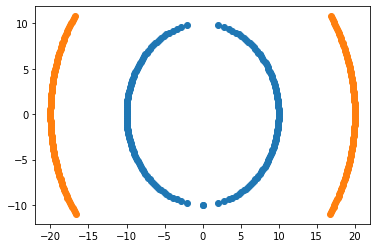

In [3]:
Y_in,X_in = circle(10,10)
Y_out,X_out = circle(20,11)

plt.scatter(Y_in,X_in)
plt.scatter(Y_out,X_out)

### Coverting numpy array to dataFrame

In [4]:
df1 =pd.DataFrame(np.vstack([Y_in,X_in]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([Y_out,X_out]).T,columns=['X1','X2'])
df2['Y']=1
df = df1.append(df2)
df.head(3)

,X1,X2,Y
0,0.000000,-10.0,0
1,1.989975,-9.8,0
2,2.800000,-9.6,0


### Fitting up support vector machine and plotling decision boundries

In [5]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_decision_boundary(X,y,ker ='linear'):
  model = svm.SVC(kernel=ker)
  clf = model.fit(X, y)
  fig, ax = plt.subplots()
  # title for the plots
  title = ('Decision surface of linear SVC ')
  # Set-up grid for plotting.
  X0, X1 = X[:, 0], X[:, 1]
  xx, yy = make_meshgrid(X0, X1)
  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  ax.set_ylabel('y')
  ax.set_xlabel('x')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(title)
  plt.show()

# Low dimension non linear data in this case does not work, as we can see the decision boundary couldn't separate it.

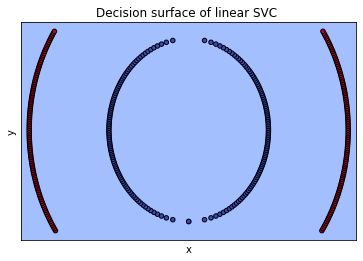

In [6]:
X = df.iloc[:, :2].values  # we only take the first two features.
y = df.Y.values
plot_decision_boundary(X,y,'linear')

### Train and Test dataset confusion matrix and F1-score

# The accuracy is also low

In [8]:
X = df.loc[:, ["X1", "X2"]].values
y = df.loc[:, "Y"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)
classifier = svm.SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.4666666666666667


# The confusion matrix shows many incorrect classification



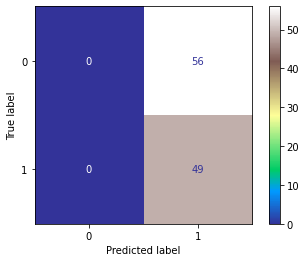

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test, cmap='terrain')

### Adding Additional dimenstion to the data
X1^2,X^2,X1*X2

In [9]:
df['X1_Sq']= df['X1']**2
df['X2_Sq']= df['X2']**2
df['X1_X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Sq,X2_Sq,X1_X2
0,0.000000,-10.0,0,0.00,100.00,-0.000000
1,1.989975,-9.8,0,3.96,96.04,-19.501754
2,2.800000,-9.6,0,7.84,92.16,-26.880000
3,3.411744,-9.4,0,11.64,88.36,-32.070398
4,3.919184,-9.2,0,15.36,84.64,-36.056489


In [10]:
X = df.loc[:, ["X1", "X2",'X1_Sq','X2_Sq','X1_X2']].values
y = df.loc[:, "Y"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)
classifier = svm.SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

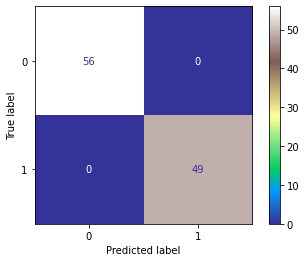

In [11]:
plot_confusion_matrix(classifier, X_test, y_test, cmap='terrain')

We still can not set the boundary with X1, X2, X1_X2

In [12]:
fig = px.scatter_3d(df, x='X1', y='X2', z='X1_X2',
              color='Y')
fig.show()

Now change with X1_Sq and X2_Sq, X1_X2. Now we can separate the boundary

In [13]:
fig = px.scatter_3d(df, x='X1_Sq', y='X2_Sq', z='X1_X2',
              color='Y')
fig.show()

**Use Kernel rbf to plot decision boundary, it will automatically find higher dimension representation of our data. You can use other kernel methods too**

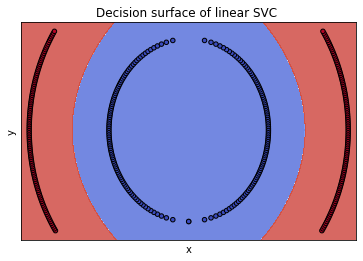

In [15]:
X = df.iloc[:, :2].values  # we only take the first two features.
y = df.Y.values
plot_decision_boundary(X,y,'rbf')